# Logistic Regression #


A retail bank wants to identitify to which of their existing stock trading customers can they offer a 10% discount on transaction commissions.

# Importing Libraries

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reading Data

In [2]:
stockTradingData = pd.read_csv('Retail_Bank_Stock_trading_data.csv')

# Data Cleaning and Pre-Processing

In [3]:
stockTradingData.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


## Finding the datatype of each column

In [4]:
stockTradingData.dtypes

REF_NO                               int64
children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan  

In [5]:
""" Function to find the no of columns under each datatype """

def printDataType(df):
    dataTypes = ['object','int64','float64','bool','datetime64','timedelta[ns]','category']
    for dt in dataTypes:
        if np.sum(df.dtypes==dt) >0:
                print('Total number of columns with {} datatype '.format(dt), np.sum(df.dtypes == dt))

In [6]:
printDataType(stockTradingData)

Total number of columns with object datatype  14
Total number of columns with int64 datatype  3
Total number of columns with float64 datatype  15


## Converting all the object datatype to Int or Float

In [7]:
""" Function to find which columns are of 'object' datatype """

def printObjectDatatypeColumn(df):
    for name in df.columns:
        if df.loc[:,name].dtype == 'object':
            print(name)

In [8]:
printObjectDatatypeColumn(stockTradingData)

children
age_band
status
occupation
occupation_partner
home_status
family_income
self_employed
self_employed_partner
TVarea
post_code
post_area
gender
region


## Converting all the object datatype to Int or Float

### Convert the Output variable 'Revenue Grid' to either 0 or 1. 

In [9]:
stockTradingData['Revenue Grid'].head()

0    1
1    2
2    2
3    2
4    2
Name: Revenue Grid, dtype: int64

* In the 'Revenue Grid' column 1 means the customer is doing enough stock trading that, the bank would profit even after offerring a 10% discount on commission to that customer.
* 2 Means the customer is **not** doing enough stock trading that, the bank would **not** profit after offerring a 10% discount on commission to that customer.
* So, let's group the profitable customer's labelled as 1 into the a new label 1 and the not so profitable customer labelled as 1 into a new label 0. 
* Let's put the new labels '0' and '1' into a new column 'y'.
* This will help us classify the customers as 0 - Not eligible for discount, and 1 - eligible for 10% discount on commission.
* Finally, we'll drop the original column 'Revenue Grid' from the dataframe.

In [10]:
stockTradingData['y'] = np.where(stockTradingData['Revenue Grid']==2, 0, 1)

In [11]:
stockTradingData.drop(['Revenue Grid'], 1, inplace=True)

### Converting the column 'children'

In [12]:
stockTradingData['children'].value_counts()

Zero    6208
1       1848
2       1607
3        473
4+        19
Name: children, dtype: int64

In [13]:
""" converting 'zero' and '4+' to 0 and 4 respectively"""

stockTradingData.loc[stockTradingData['children'] == 'Zero','children'] =0
stockTradingData.loc[stockTradingData['children'] =='4+', 'children'] = 4

In [14]:
stockTradingData['children'].dtype

dtype('O')

In [15]:
"""After converting the 'zero' and '4+' to 0 and 4 we have now converted all
the strings in the column 'children' to integer. But still the datatype of 
that column remains as 'object'. 
So, we have to convert that column into an integer column """

stockTradingData['children'] = pd.to_numeric(stockTradingData['children'], errors='coerce')

In [16]:
printObjectDatatypeColumn(stockTradingData)

age_band
status
occupation
occupation_partner
home_status
family_income
self_employed
self_employed_partner
TVarea
post_code
post_area
gender
region


### Converting the column 'age_band' to several dummy variables

In [17]:
stockTradingData['age_band'].value_counts()

45-50      1359
36-40      1134
41-45      1112
31-35      1061
51-55      1052
55-60      1047
26-30       927
61-65       881
65-70       598
22-25       456
71+         410
18-21        63
Unknown      55
Name: age_band, dtype: int64

There are 13 different age bands. If we create dummy columns for 
each band then we will have to create 12 dummy columns. In order 
to reduce the number of dummy columns, let's group them together 
first with the output variable and then create dummies according
to the grouping

In [18]:
round((stockTradingData.groupby('age_band')['y']).mean(),2)

age_band
18-21      0.17
22-25      0.11
26-30      0.11
31-35      0.11
36-40      0.13
41-45      0.11
45-50      0.10
51-55      0.10
55-60      0.11
61-65      0.09
65-70      0.10
71+        0.10
Unknown    0.05
Name: y, dtype: float64

* Now, we have 6 groups[0.05,0.09,0.10,0.11,0.13,0.17] grouped according to their frequency of occurrence

* Let's keep the group 'Unknown' just like that. 

* Let's club the remaining age bands with the same mean value into the same group and create a new columns column for each group.


In [19]:
""" Grouping age_band with same frequencies into the same 
list and creating a corresponding string for each list. 

If the particular column we are working with contains values
in from one of the lists then those locations in the column
will be relaced with the corresponding strings we create for
each list """


firstBand = ['22-25','26-30','31-35','41-45','55-60']
firstBandGroup = 'ab_11'

secondBand = ['45-50','51-55','65-70','71+']
secondBandGroup = 'ab_10'

thirdBand = ['61-65']
thirdBandGroup = 'ab_9'

fourthBand = ['36-40']
fourthBandGroup = 'ab_13'

fifthBand = ['18-21']
fifthBandGroup= 'ab_17'

In [20]:
""" Creating two list of lists for ease of argument passing."""

bandListAgeBand = [firstBand,secondBand,thirdBand,fourthBand,fifthBand]
groupListAgeBand= [firstBandGroup, secondBandGroup, thirdBandGroup, fourthBandGroup, fifthBandGroup]

In [21]:
""" 
Function to replace values in a column with a string. 
The values in a column with the same frequency of occurrence 
were already grouped into lists. 

For each list we have also created a string. 

This function will find all positions in a column which has values 
contained in the list and will replace those values with the string
we already created corresponding to each list. 
"""

def groupDataByFrequency(df,columnName, bandList, groupList):
    for i in range(len(stockTradingData)):
        for j in range(len(bandList)):
            if stockTradingData.loc[i,columnName] in bandList[j]:
                stockTradingData.loc[i,columnName] = groupList[j]
            if stockTradingData.loc[i,columnName] in bandList[j]:
                stockTradingData.loc[i,columnName] = groupList[j]
            if stockTradingData.loc[i,columnName] in bandList[j]:
                stockTradingData.loc[i,columnName] = groupList[j]
            if stockTradingData.loc[i,columnName] in bandList[j]:
                stockTradingData.loc[i,columnName] = groupList[j]
            if stockTradingData.loc[i,columnName] in bandList[j]:
                stockTradingData.loc[i,columnName] = groupList[j]

In [22]:
groupDataByFrequency(stockTradingData, columnName= 'age_band', bandList=bandListAgeBand, groupList=groupListAgeBand)

In [23]:
stockTradingData['age_band'].value_counts()

ab_11      4603
ab_10      3419
ab_13      1134
ab_9        881
ab_17        63
Unknown      55
Name: age_band, dtype: int64

In [24]:
""" Now that we have reduced the groups in the data we can now create dummy variables"""

ageBandDummies = pd.get_dummies(stockTradingData['age_band'])
ageBandDummies.head()

,Unknown,ab_10,ab_11,ab_13,ab_17,ab_9
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [25]:
""" 
We can drop the column 'Unknown' from the ageBandDummies dataframe. 
It occurs only 55 times out of all the 10K+ values."""

ageBandDummies.drop(['Unknown'],axis=1,inplace=True)

In [26]:
ageBandDummies

,ab_10,ab_11,ab_13,ab_17,ab_9
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10150,1,0,0,0,0
10151,1,0,0,0,0
10152,0,1,0,0,0
10153,1,0,0,0,0


In [27]:
""" Now, let's add this ageBandDummies dataframe back into the original dataframe"""

stockTradingData = stockTradingData.join(ageBandDummies)

In [28]:
""" Let's also drop the column 'age_band' from the stockTradingData dataframe"""

stockTradingData.drop(['age_band'], axis=1, inplace=True)

In [29]:
printObjectDatatypeColumn(stockTradingData)

status
occupation
occupation_partner
home_status
family_income
self_employed
self_employed_partner
TVarea
post_code
post_area
gender
region


### Converting the column 'occupation' to several dummy variables

In [30]:
stockTradingData['occupation'].value_counts()

Professional         2449
Retired              2206
Secretarial/Admin    1797
Housewife            1255
Business Manager      732
Unknown               567
Manual Worker         556
Other                 537
Student                56
Name: occupation, dtype: int64

In [31]:
round(stockTradingData.groupby('occupation')['y'].mean(),2)

occupation
Business Manager     0.12
Housewife            0.09
Manual Worker        0.11
Other                0.11
Professional         0.12
Retired              0.10
Secretarial/Admin    0.11
Student              0.11
Unknown              0.11
Name: y, dtype: float64

In [32]:
occFirstBand = ['Retired']
occFirstBandGroup = 'ocup_10'

occSecondBand = ['Manual Worker','Other','Secretarial/Admin','Student','Unknown']
occSecondBandGroup = 'ocup_11'

occThirdBand = ['Business Manager','Professional']
occThirdBandGroup = 'ocup_12'

In [33]:
occBand = [occFirstBand,occSecondBand,occThirdBand]
occGroup = [occFirstBandGroup,occSecondBandGroup,occThirdBandGroup]

In [34]:
groupDataByFrequency(stockTradingData,columnName='occupation', bandList=occBand, groupList=occGroup)

In [35]:
occDummies = pd.get_dummies(stockTradingData['occupation'])

In [36]:
stockTradingData=stockTradingData.join(occDummies)

In [37]:
stockTradingData.drop(['occupation','Housewife'], axis=1, inplace=True)

In [38]:
printObjectDatatypeColumn(stockTradingData)

status
occupation_partner
home_status
family_income
self_employed
self_employed_partner
TVarea
post_code
post_area
gender
region


### Converting the column 'occupation_partner' into several dummy variables

In [39]:
stockTradingData['occupation_partner'].value_counts()

Unknown              2394
Professional         2051
Retired              1936
Manual Worker        1508
Business Manager      737
Secretarial/Admin     662
Housewife             527
Other                 324
Student                16
Name: occupation_partner, dtype: int64

In [40]:
round(stockTradingData.groupby('occupation_partner')['y'].mean(),2)

occupation_partner
Business Manager     0.11
Housewife            0.11
Manual Worker        0.11
Other                0.10
Professional         0.11
Retired              0.10
Secretarial/Admin    0.12
Student              0.12
Unknown              0.10
Name: y, dtype: float64

In [41]:
partOccFirstBand = ['Other','Retired','Unknown']
partOccFirstBandGroup = 'partOcc_10'

partOccSecondBand = ['Business Manager','Housewife','Manual Worker','Professional']
partOccSecondBandGroup = 'partOcc_11'

partOccThirdBand = ['Secretarial/Admin','Student']
partOccThirdBandGroup = 'partOcc_12'

In [42]:
partOccBand = [partOccFirstBand,partOccSecondBand,partOccThirdBand]
partOccGroup = [partOccFirstBandGroup, partOccSecondBandGroup,partOccThirdBandGroup]

In [43]:
groupDataByFrequency(stockTradingData, columnName='occupation_partner', bandList=partOccBand, groupList=partOccGroup)

In [44]:
round(stockTradingData.groupby('occupation_partner')['y'].mean(),2)

occupation_partner
partOcc_10    0.10
partOcc_11    0.11
partOcc_12    0.12
Name: y, dtype: float64

In [45]:
partOccupation = pd.get_dummies(stockTradingData['occupation_partner'])

In [46]:
stockTradingData = stockTradingData.join(partOccupation)

In [47]:
stockTradingData.drop(['occupation_partner'], axis=1, inplace=True)

In [48]:
printObjectDatatypeColumn(stockTradingData)

status
home_status
family_income
self_employed
self_employed_partner
TVarea
post_code
post_area
gender
region


### Converting 'family_income'variable into mean family income

In [49]:
stockTradingData['family_income'].value_counts()

>=35,000             2517
<27,500, >=25,000    1227
<30,000, >=27,500     994
<25,000, >=22,500     833
<20,000, >=17,500     683
<12,500, >=10,000     677
<17,500, >=15,000     634
<15,000, >=12,500     629
<22,500, >=20,000     590
<10,000, >= 8,000     563
< 8,000, >= 4,000     402
< 4,000               278
Unknown               128
Name: family_income, dtype: int64

In [50]:
round(stockTradingData.groupby('family_income')['y'].mean(),2)

family_income
< 4,000              0.08
< 8,000, >= 4,000    0.08
<10,000, >= 8,000    0.11
<12,500, >=10,000    0.10
<15,000, >=12,500    0.11
<17,500, >=15,000    0.12
<20,000, >=17,500    0.11
<22,500, >=20,000    0.12
<25,000, >=22,500    0.10
<27,500, >=25,000    0.10
<30,000, >=27,500    0.12
>=35,000             0.11
Unknown              0.07
Name: y, dtype: float64

Since this is a currency related numeric variable, let's convert each band into the mean of the income band

Here we have three bands, '< 4,000', '>=35,000', and 'Unknown' instead of removing them we can just club them all together. 
An easy way to club it is to create a new variable called 'fi' with a default value of 4 At every location where the 'family_income' variable has a band, this new variable will have the average value of that band. Every other location will have a default value of 4. 

In [51]:
stockTradingData['fi'] = 4

In [52]:
stockTradingData.loc[stockTradingData['family_income'] == '< 8,000, >= 4,000', 'fi'] = (8+4)/2
stockTradingData.loc[stockTradingData['family_income'] == '<10,000, >= 8,000', 'fi'] = (10+8)/2
stockTradingData.loc[stockTradingData['family_income'] == '<12,500, >=10,000', 'fi'] = (12.5+10)/2
stockTradingData.loc[stockTradingData['family_income'] == '<15,000, >=12,500', 'fi'] = (15+12.5)/2
stockTradingData.loc[stockTradingData['family_income'] == '<17,500, >=15,000', 'fi'] = (17.5+15)/2
stockTradingData.loc[stockTradingData['family_income'] == '<20,000, >=17,500', 'fi'] = (20+17.5)/2
stockTradingData.loc[stockTradingData['family_income'] == '<22,500, >=20,000', 'fi'] = (22.5+20)/2
stockTradingData.loc[stockTradingData['family_income'] == '<25,000, >=22,500', 'fi'] = (25+22.5)/2
stockTradingData.loc[stockTradingData['family_income'] == '<27,500, >=25,000', 'fi'] = (27.5+25)/2
stockTradingData.loc[stockTradingData['family_income'] == '<30,000, >=27,500', 'fi'] = (30+27.5)/2

In [53]:
stockTradingData['fi']

0        16.25
1        26.25
2        28.75
3        13.75
4        28.75
         ...  
10150    28.75
10151    23.75
10152     4.00
10153     9.00
10154    26.25
Name: fi, Length: 10155, dtype: float64

In [54]:
stockTradingData['fi'].value_counts()

4.00     2923
26.25    1227
28.75     994
23.75     833
18.75     683
11.25     677
16.25     634
13.75     629
21.25     590
9.00      563
6.00      402
Name: fi, dtype: int64

In [55]:
stockTradingData.drop(['family_income'], axis=1, inplace=True)

In [56]:
printObjectDatatypeColumn(stockTradingData)

status
home_status
self_employed
self_employed_partner
TVarea
post_code
post_area
gender
region


### Converting variable 'self_employed' into two integer

In [57]:
stockTradingData['self_employed'].value_counts()

No     9436
Yes     719
Name: self_employed, dtype: int64

In [58]:
""" Creating a new column called 'selfEmployedYes' """
stockTradingData['selfEmployedYes'] = 0

In [59]:
stockTradingData['selfEmployedYes'] = np.where(stockTradingData['self_employed']=='Yes', 1, 0)

In [60]:
stockTradingData['self_employed'].value_counts()

No     9436
Yes     719
Name: self_employed, dtype: int64

In [61]:
stockTradingData.drop(['self_employed'], axis=1, inplace=True)

In [62]:
printObjectDatatypeColumn(stockTradingData)

status
home_status
self_employed_partner
TVarea
post_code
post_area
gender
region


### Converting 'self_employed_partner' variable into dummy variable

In [63]:
stockTradingData['self_employed_partner'].value_counts()

No     9026
Yes    1129
Name: self_employed_partner, dtype: int64

In [64]:
stockTradingData['selfEmployedPartnerYes'] = 0

In [65]:
stockTradingData['selfEmployedPartnerYes'] = np.where(stockTradingData['self_employed_partner']=='Yes',1,0)

In [66]:
stockTradingData['selfEmployedPartnerYes'].value_counts()

0    9026
1    1129
Name: selfEmployedPartnerYes, dtype: int64

In [67]:
stockTradingData.drop(['self_employed_partner'], axis=1, inplace=True)

In [68]:
printObjectDatatypeColumn(stockTradingData)

status
home_status
TVarea
post_code
post_area
gender
region


### Converting variable 'status' into integer

In [69]:
stockTradingData['status'].value_counts()

Partner                 7709
Single/Never Married    1101
Divorced/Separated       679
Widowed                  618
Unknown                   48
Name: status, dtype: int64

In [70]:
stockTradingData.loc[stockTradingData['status'] == 'Partner', 'status'] = 'st_partner'
stockTradingData.loc[stockTradingData['status'] == 'Single/Never Married', 'status'] = 'st_singleNm'
stockTradingData.loc[stockTradingData['status'] == 'Divorced/Separated', 'status'] = 'st_divSep'

In [71]:
stockTradingData['status'].value_counts()

st_partner     7709
st_singleNm    1101
st_divSep       679
Widowed         618
Unknown          48
Name: status, dtype: int64

In [72]:
statusDummies = pd.get_dummies(stockTradingData['status'])

In [73]:
statusDummies.head()

,Unknown,Widowed,st_divSep,st_partner,st_singleNm
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,1,0


In [74]:
stockTradingData = stockTradingData.join(statusDummies)

In [75]:
stockTradingData

,REF_NO,children,status,home_status,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,...,partOcc_11,partOcc_12,fi,selfEmployedYes,selfEmployedPartnerYes,Unknown,Widowed,st_divSep,st_partner,st_singleNm
0,1,0,st_partner,Own Home,1972,HTV,NP4 9HS,NP4,148.44,142.95,...,0,1,16.25,0,0,0,0,0,1,0
1,2,0,st_singleNm,Own Home,1998,Granada,M41 0QH,M41,0.00,74.98,...,0,0,26.25,0,0,0,0,0,0,1
2,3,0,st_singleNm,Own Home,1996,Tyne Tees,NE30 1JZ,NE30,0.00,166.44,...,0,0,28.75,1,0,0,0,0,0,1
3,5,0,st_singleNm,Own Home,1997,Central,HR9 7RJ,HR9,0.00,0.00,...,1,0,13.75,0,0,0,0,0,0,1
4,6,0,st_partner,Own Home,1995,Scottish TV,KA10 7LS,KA10,73.45,57.96,...,0,0,28.75,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,11512,1,st_partner,Own Home,1972,Carlton,SM4 5RF,SM4,0.00,0.00,...,1,0,28.75,0,0,0,0,0,1,0
10151,11513,0,st_partner,Rent from Council/HA,1988,Meridian,RG14 7PA,RG14,0.00,110.95,...,1,0,23.75,0,0,0,0,0,1,0
10152,11514,2,st_partner,Own Home,1992,Central,OX15 0PU,OX15,124.93,0.00,...,1,0,4.00,0,0,0,0,0,1,0
10153,11516,0,st_partner,Own Home,1970,Carlton,CM15 0LU,CM15,0.00,35.98,...,1,0,9.00,0,1,0,0,0,1,0


In [76]:
stockTradingData.drop(['status','Unknown','Widowed'], axis=1, inplace=True)

In [77]:
printObjectDatatypeColumn(stockTradingData)

home_status
TVarea
post_code
post_area
gender
region


### Converting 'home_status' variable into int

In [78]:
stockTradingData['home_status'].value_counts()

Own Home                9413
Rent from Council/HA     322
Rent Privately           261
Live in Parental Hom     109
Unclassified              50
Name: home_status, dtype: int64

In [79]:
stockTradingData['hs_own']=0
stockTradingData['hs_rent']=0

In [80]:
stockTradingData['hs_own'] = np.where(stockTradingData['home_status'] == 'Own Home',1,0)
stockTradingData['hs_rent'] = np.where(stockTradingData['home_status'] == 'Rent from Council/HA',1,0)
stockTradingData['hs_rent'] = np.where(stockTradingData['home_status'] == 'Rent Privately',1,0)

In [81]:
stockTradingData.drop(['home_status'], axis=1, inplace=True)

In [82]:
printObjectDatatypeColumn(stockTradingData)

TVarea
post_code
post_area
gender
region


### Converting 'gender' variable into int

In [83]:
stockTradingData['gender'].value_counts()

Female     7634
Male       2486
Unknown      35
Name: gender, dtype: int64

In [84]:
stockTradingData['gender_f'] = np.where(stockTradingData['gender']=='Female',1,0)

In [85]:
stockTradingData.drop(['gender'], axis=1, inplace=True)

In [86]:
printObjectDatatypeColumn(stockTradingData)

TVarea
post_code
post_area
region


For now, I'll stop with this and drop the four variables 'TVarea', 'post_code','post_area','region' and proceed with modelling. 

In [87]:
stockTradingData.drop(['TVarea','post_code','post_area','region'], axis=1, inplace=True)

In [88]:
printObjectDatatypeColumn(stockTradingData)

Now, there are no columns with 'object' datatype. Let's see what the datatype of the other columns are. 

In [89]:
stockTradingData.dtypes

REF_NO                               int64
children                             int64
year_last_moved                      int64
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purchase Amount             float64
Investment in Commudity            float64
Investment in Equity               float64
Investment in Derivative           float64
Portfolio Balance                  float64
y                                    int32
ab_10                                uint8
ab_11                                uint8
ab_13                                uint8
ab_17                                uint8
ab_9       

### Detecting Missing and Null values

In [90]:
stockTradingData.isna().sum()

REF_NO                             0
children                           0
year_last_moved                    0
Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
Average A/C Balance                0
Personal Loan                      0
Investment in Mutual Fund          0
Investment Tax Saving Bond         0
Home Loan                          0
Online Purchase Amount             0
Investment in Commudity            0
Investment in Equity               0
Investment in Derivative           0
Portfolio Balance                  0
y                                  0
ab_10                              0
ab_11                              0
ab_13                              0
ab_17                              0
ab_9                               0
ocup_10                            0
ocup_11                            0
ocup_12                            0
p

In [91]:
stockTradingData.isnull().sum()

REF_NO                             0
children                           0
year_last_moved                    0
Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
Average A/C Balance                0
Personal Loan                      0
Investment in Mutual Fund          0
Investment Tax Saving Bond         0
Home Loan                          0
Online Purchase Amount             0
Investment in Commudity            0
Investment in Equity               0
Investment in Derivative           0
Portfolio Balance                  0
y                                  0
ab_10                              0
ab_11                              0
ab_13                              0
ab_17                              0
ab_9                               0
ocup_10                            0
ocup_11                            0
ocup_12                            0
p

In [92]:
stockTradingData.head()

,REF_NO,children,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,...,partOcc_12,fi,selfEmployedYes,selfEmployedPartnerYes,st_divSep,st_partner,st_singleNm,hs_own,hs_rent,gender_f
0,1,0,1972,148.44,142.95,0.00,81.96,0.00,29.99,0.00,...,1,16.25,0,0,0,1,0,1,0,1
1,2,0,1998,0.00,74.98,0.00,25.99,0.00,0.00,0.00,...,0,26.25,0,0,0,0,1,1,0,1
2,3,0,1996,0.00,166.44,20.99,291.37,11.48,166.94,0.00,...,0,28.75,1,0,0,0,1,1,0,0
3,5,0,1997,0.00,0.00,0.00,20.49,0.00,39.46,0.00,...,0,13.75,0,0,0,0,1,1,0,1
4,6,0,1995,73.45,57.96,0.00,177.42,41.95,39.47,10.97,...,0,28.75,0,0,0,1,0,1,0,1


There are no null or missing values,so let's proceed with the modelling.

# Modelling

## Data splitting for training and testing

In [93]:
trainData, testData = train_test_split(stockTradingData, test_size = 0.2, random_state = 1)

In [94]:
xTrain = trainData.drop(['y','REF_NO'], axis=1)

In [95]:
yTrain = trainData['y']

In [96]:
xTest = testData.drop(['y','REF_NO'],axis=1)

In [97]:
yTest = testData['y']

## Training a Logistic Regression Model

In [98]:
logReg = LogisticRegression(penalty='l1',solver='liblinear',class_weight='balanced',random_state=1)

In [99]:
logReg.fit(xTrain,yTrain)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
""" Predicting classes """
classPredictions = logReg.predict(xTest)

**Note: In the predicted classes, first column is for '0' and second one is for '1'

In [101]:
"""predicting probabilities for only the  positive classes"""

probabilityPredictions = logReg.predict_proba(xTest)[:,1]

In [102]:
rocAucScore = roc_auc_score(yTest, logReg.predict(xTest))

In [103]:
rocAucScore

0.891566768041211

In [104]:
fpr, tpr, _ = roc_curve(yTest, probabilityPredictions)

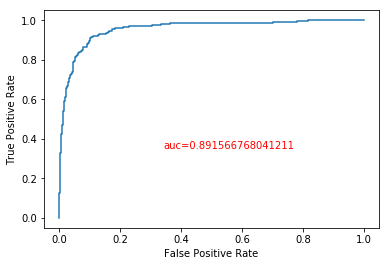

In [105]:
%matplotlib inline
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.figtext(0.4, 0.4,'auc='+str(rocAucScore), color='red')
plt.show()

# Model Evaluation

## Accuracy, Sensitivity, Specificity, Precision and Recall

*Confusion Matrix*

![](CM.jpg)

*Total Positives*

$$ P = TP + FN $$

*Total Negatives*

$$ N = FP + TN $$

*Accuracy: measures how correct our model's predictions are.*

$$ Accuracy = \dfrac{TP + TN }{P + N} $$

*Precision: Measures out of all the examples predicted as 'Positive' by the model, how many are actualy 'Positive'*

$$ Precision = \dfrac {TP}{TP+FP} $$

*Sensitivity: Measures out of all the real 'Positive' examples how many can out model predict as 'Positive'.*

$$ Sensitivity = \dfrac {TP} {TP + FN} $$

 **Sensitivity is also known as Recall**

*Specificity: Measures out of all the real 'Negative' samples how many can the model predict as 'Negative' *

$$ Specificity = \dfrac{TN} {TN + FP} $$

Now that we have created 100 cut-off points between 0 and 1. For each of these points, we will detarmine the **True Positive (TP), False Positive(FP), True Negative (TN) and False Negative (FN)** 

Using these for values we calculated, we will calculate the **KS** and then choose the best cutoff as the one having the highest KS

## Determining Cut-off probability to predict two classes

There are two methods to determine cut-off values for our models. 
1. Kolmogorov-Smirnoff (KS) test score 
2. F-Beta Score


### Determining cut-off using Kolmogorov-Smirnoff (KS) 

*KS Statistic or Kolmogorov-Smirnov statistic is the maximum difference between the cumulative true positive and cumulative false positive rate. It is often used as the deciding metric to judge the efficacy of models in credit scoring.*

$$ KS = TPR - FPR $$

$$ TPR = \dfrac {TP} {P} $$

$$ FPR = \dfrac {FP} {N} $$

$$ KS = \dfrac {TP} {TP+FN} - \dfrac {FP} {TN+FP} $$

Let's take only the probabilities for class 1 and then set up a cut off on that

#### Extracting only the probability score for the positive class

In [106]:
probScore = pd.Series(list(logReg.predict_proba(xTrain)[:,1]))

On these scores, we will consider many cutoffs between 0 and 1

#### Creating 100 cutoff points between 0 and 1

In [119]:
cutoffs = np.linspace(0,1,100)

#### Determining cutoffs

In [126]:
KS_CUT = []
TPR_list = []
FPR_list = []

for cutoff in cutoffs:
    predicted = pd.Series([0 for val in range(len(yTrain))])
    predicted[probScore>cutoff] = 1
    realPred = pd.DataFrame(list(zip(yTrain,predicted)), columns=['Real','Predicted'])
    
    TP = len(realPred[(realPred['Real']==1) & (realPred['Predicted']==1)])
    FP = len(realPred[(realPred['Real']==0) & (realPred['Predicted']==1)])
    TN = len(realPred[(realPred['Real']==0) & (realPred['Predicted']==0)])
    FN = len(realPred[(realPred['Real']==1) & (realPred['Predicted']==0)])
    
    P = TP+FN
    N = TN+FP
    
    TPR = TP/P
    TPR_list.append(TPR)
    FPR = FP/N
    FPR_list.append(FPR)
    
    KS = (TP/P)-(FP/N)
    KS_CUT.append(KS)
    
cutoffData = pd.DataFrame(list(zip(cutoffs,KS_CUT)), columns=['Cutoff','KS'])
KS_cutoff = cutoffData[cutoffData['KS']== cutoffData['KS'].max()]['Cutoff']

print(KS_cutoff)

49    0.494949
Name: Cutoff, dtype: float64


#### Plotting TPR, FPR and TPR-FPR to visualize the best cutoff rate

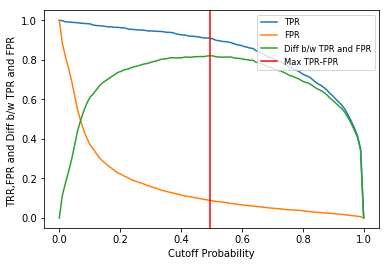

In [179]:
""" Plotting TRP, FPR and the TPR-FPR """

%matplotlib inline
plt.figure()
plt.plot(cutoffs,TPR_list, label='TPR')
plt.plot(cutoffs,FPR_list, label='FPR')
plt.plot(cutoffs, np.subtract(TPR_list, FPR_list), label='Diff b/w TPR and FPR')
plt.axvline(x=KS_cutoff.values, c='red', label = 'Max TPR-FPR')
plt.xlabel('Cutoff Probability', fontdict={'size':10} )
plt.ylabel('TRR,FPR and Diff b/w TPR and FPR ',fontdict={'size':10})
plt.legend(loc=1, fontsize = 'small')

#### Performace of cut-off value predicted using KS score on test data

The optimal cutoff determined on the traning data using KS method is 0.4949. Let's see how this cutoff works on test data

In [109]:
testDataProbScore=pd.Series(list(logReg.predict_proba(xTest)[:,1]))
testDataPredicted = pd.Series([0 for val in range(len(yTest))])
testDataPredicted[testDataProbScore>float(KS_cutoff)] = 1
testRealPred=pd.DataFrame(list(zip(yTest,testDataPredicted)), columns=['Real','Predicted'])
confusionMatrix = pd.crosstab(testRealPred['Real'], testRealPred['Predicted'])

In [110]:
print(confusionMatrix)

Predicted     0    1
Real                
0          1653  160
1            29  189


In [111]:
TN_test = confusionMatrix.iloc[0,0]
TP_test = confusionMatrix.iloc[1,1]
FP_test = confusionMatrix.iloc[0,1]
FN_test = confusionMatrix.iloc[1,0]

P_test = FN_test+TP_test
N_test = TN_test + FP_test 

accuraccy = (TP_test + TN_test) / (P_test + N_test)
Sensitivity = TP_test/P_test
Specificity = TN_test/N_test

In [112]:
print(accuraccy)

0.9069423929098966


In [113]:
print(Sensitivity)

0.8669724770642202


In [114]:
print(Specificity)

0.9117484831770546


## Determining cutoff using F-Beta Score